In [1]:
import gzip
import collections
import numpy as np
import pandas as pd

### CHECK https://github.com/broadinstitute/gtex-pipeline/tree/master/gene_model
### Important for preprocessing the annotation GTF
### Use script collapse_annotation.py to obtain collapsed gencode file


infile="/cbscratch/franco/datasets/GENCODE/gencode.v12.collapsed.genes.gtf"
outfile="/cbscratch/franco/datasets/GENCODE/gencode.v12.coding_lengths"

l = 0
genedict = collections.defaultdict(dict)
lead_transcripts = dict()
with open(infile) as instream:
    for line in instream:
        if line.startswith("#"):
            continue
        arr = line.strip().split("\t")
        chrm = arr[0]
        etype = arr[2]
        start = int(arr[3])
        end = int(arr[4])
        annots = arr[8].split(";")
        gene_id = annots[0].split()[1][1:-1]
        if etype == "gene":
            genedict[gene_id]["length"] = end - start + 1
        if etype == "exon":
            for aa in annots:
                if aa.startswith(" transcript_id"):
                    t_id = aa.split()[1][1:-1]
                    if t_id in genedict[gene_id]:
                        genedict[gene_id][t_id] += end - start + 1
                    else:
                        genedict[gene_id][t_id] = end - start + 1
                        lead_transcripts[gene_id] = t_id
                    break
        l += 1
#         if l > 20:
#             break

with open(outfile, 'w') as outstream:
    for i, gene in enumerate(lead_transcripts.keys()):
        t_id = lead_transcripts[gene]
        t_length = genedict[gene][t_id]
        outstream.write("{:s}\t{:d}\n".format(gene, t_length))


In [3]:
import gzip
import collections
import numpy as np
import pandas as pd

### Read gene lengths file for gencode v26
lengthsfile = outfile="/cbscratch/franco/datasets/GENCODE/gencode.v12.coding_lengths"
gene_len_dict = dict()

with open(lengthsfile) as instream:
    for line in instream:
        arr = line.rstrip().split()
        gene_len_dict[arr[0].split(".")[0]] = int(arr[1])

In [4]:
reads = pd.read_csv("/cbscratch/franco/datasets/geuvadis/expression/GD660.GeneQuantCount.txt.gz", sep="\t", header=0, index_col=0)

In [5]:
reads.index

Index(['ENSG00000225538.1', 'ENSG00000237851.1', 'ENSG00000243765.1',
       'ENSG00000257527.1', 'ENSG00000212855.5', 'ENSG00000151503.7',
       'ENSG00000254903.1', 'ENSG00000254681.2', 'ENSG00000250501.1',
       'ENSG00000228477.1',
       ...
       'ENSG00000167196.9', 'ENSG00000137709.4', 'ENSG00000233415.1',
       'ENSG00000006007.7', 'ENSG00000236345.1', 'ENSG00000172297.6',
       'ENSG00000259738.1', 'ENSG00000212040.1', 'ENSG00000125266.5',
       'ENSG00000230711.2'],
      dtype='object', name='TargetID', length=53934)

In [6]:
# Check with recently released counts and TPMs if it still holds

reads = pd.read_csv("/cbscratch/franco/datasets/geuvadis/expression/GD660.GeneQuantCount.txt.gz", sep="\t", header=0, index_col=0)

ix = list()
genenames = [x.split(".")[0] for x in list(reads.index)]
for name in genenames:
    if name in gene_len_dict:
        ix.append(True)
    else:
        ix.append(False)

geneix = np.where(ix)[0]
filtered_genenames = [genenames[i] for i in geneix]
genelengths = np.array([gene_len_dict[x] for x in filtered_genenames])
filtered_reads = reads.iloc[np.array(ix)]

In [7]:
filtered_reads.head()

,Gene_Symbol,Chr,Coord,HG00096.1.M_111124_6,HG00097.7.M_120219_2,HG00099.1.M_120209_6,HG00099.5.M_120131_3,HG00100.2.M_111215_8,HG00101.1.M_111124_4,HG00102.3.M_120202_8,...,NA20810.2.M_111215_7,NA20811.1.M_111124_5,NA20812.2.M_111216_6,NA20813.5.M_120131_1,NA20814.2.M_111215_6,NA20815.5.M_120131_5,NA20816.3.M_120202_7,NA20819.3.M_120202_2,NA20826.1.M_111124_1,NA20828.2.M_111216_8
TargetID,,,,,,,,,,,,,,,,,,,,,
ENSG00000225538.1,ENSG00000225538.1,11,55850277,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0
ENSG00000237851.1,ENSG00000237851.1,6,143109260,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
ENSG00000243765.1,ENSG00000243765.1,15,58442766,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
ENSG00000257527.1,ENSG00000257527.1,16,18505708,20.0,30.000002,14.0,10.0,8.0,36.0,18.0,...,32.0,24.0,30.0,18.0,10.0,8.0,16.0,6.0,15.999999,8.0
ENSG00000212855.5,ENSG00000212855.5,Y,9578193,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [8]:
rpkms_arr = np.zeros((filtered_reads.shape[0], filtered_reads.shape[1]-3))
tpms_arr  = np.zeros((filtered_reads.shape[0], filtered_reads.shape[1]-3))
coverage  = dict()

for i in range(3, filtered_reads.shape[1]):
    sampid = filtered_reads.columns[i]
    # shortid = sampid.split(".")[0]
    # Calculate TPMs
    rpk = filtered_reads.iloc[:,i] * 1000 / genelengths
    sf = np.sum(rpk) / 1000000
    tpms = rpk / sf
    tpms_arr[:, i-3] = tpms
    # print(tpms)

    # Calculate RPKMs
    sf2 = np.sum(filtered_reads.iloc[:, i]) / 1e6
    rpm = filtered_reads.iloc[:, i]  / sf2
    rpkm = rpm * 1000 / genelengths
    rpkms_arr[:, i-3] = rpkm
    
    coverage[sampid] = (sf, sf2)

In [9]:
rpkms_df = pd.DataFrame(rpkms_arr, columns = filtered_reads.columns[3:], index=filtered_reads.index)
tpms_df = pd.DataFrame(tpms_arr, columns = filtered_reads.columns[3:], index=filtered_reads.index)

In [10]:
coverage

{'HG00096.1.M_111124_6': (37.71945258223704, 47.413842043843005),
 'HG00097.7.M_120219_2': (64.754763433341, 75.99885924189701),
 'HG00099.1.M_120209_6': (28.184353669090996, 37.01459655162899),
 'HG00099.5.M_120131_3': (46.33033043241143, 45.438152622851),
 'HG00100.2.M_111215_8': (39.39927443828602, 42.552756072049),
 'HG00101.1.M_111124_4': (31.612820408373068, 38.102757144734),
 'HG00102.3.M_120202_8': (34.34916483313569, 39.367150307915004),
 'HG00103.4.M_120208_3': (48.26235766140017, 53.709588590050004),
 'HG00104.1.M_111124_5': (45.0098774589022, 44.194021731523),
 'HG00105.1.M_120209_7': (35.06379959145481, 40.45240870286),
 'HG00105.3.M_120223_6': (81.79848620109895, 85.28690267089699),
 'HG00106.4.M_120208_5': (46.39957232619747, 55.41084712255101),
 'HG00108.7.M_120219_2': (86.48711561458605, 73.717142160087),
 'HG00109.1.M_120209_4': (29.778122450219534, 34.11779233275),
 'HG00109.3.M_120202_5': (34.62719065127992, 33.568311989275),
 'HG00110.2.M_120131_2': (67.00539508342

In [11]:
rpkms_corr = pd.read_csv("/cbscratch/franco/datasets/geuvadis/expression/GD462.GeneQuantRPKM.50FN.samplename.resk10.txt.gz", sep="\t", header=0, index_col=0)

In [12]:
# Find out which sample replicate was retained in the final files
# result: The left sample, the one with highest coverage

import matplotlib.pyplot as plt
tmp_df1 = pd.concat((rpkms_df.loc[:,"HG00099.5.M_120131_3"], rpkms_corr.loc[:,"HG00099"]), axis=1, sort=False)
tmp_df2 = pd.concat((rpkms_df.loc[:,"HG00099.1.M_120209_6"], rpkms_corr.loc[:,"HG00099"]), axis=1, sort=False)

print(coverage["HG00099.5.M_120131_3"])
print(coverage["HG00099.1.M_120209_6"])

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(tmp_df1.iloc[:,0], tmp_df1.iloc[:,1])
ax2.scatter(tmp_df2.iloc[:,0], tmp_df2.iloc[:,1])
plt.show()

(46.33033043241143, 45.438152622851)
(28.184353669090996, 37.01459655162899)


<Figure size 1400x600 with 2 Axes>

In [31]:
# Filter out the replicates with lower coverage

orig_sampids = list(rpkms_corr.columns)[3:]

selected_sampids = list()
for sampid in orig_sampids:
    sampid_group = [k for k in coverage if k.startswith(sampid)]
    if len(sampid_group) > 1:
        best = sampid_group[0]
        for sam in sampid_group[1:]:
            if coverage[sam][0] > coverage[best][0]:
                if coverage[sam][1] <= coverage[best][1]:
                    print(sam, best)
                    print(f"{coverage[sam]} vs {coverage[best]}")
                    print("WHAAAAT")
                best = sam
        selected_sampids.append(best)
    else:
        selected_sampids.append(sampid_group[0])

HG00109.3.M_120202_5 HG00109.1.M_120209_4
(34.62719065127992, 33.568311989275) vs (29.778122450219534, 34.11779233275)
WHAAAAT
NA06986.7.M_120219_6 NA06986.2.M_111215_4
(55.42171060636873, 64.333929802734) vs (54.836872394759375, 65.113766701853)
WHAAAAT


(55.42171060636873, 64.333929802734)
(54.836872394759375, 65.113766701853)


/usr/users/fsimone/opt/miniconda/3/envs/env3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/usr/users/fsimone/opt/miniconda/3/envs/env3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/usr/users/fsimone/opt/miniconda/3/envs/env3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/usr/users/fsimone/opt/miniconda/3/envs/env3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  


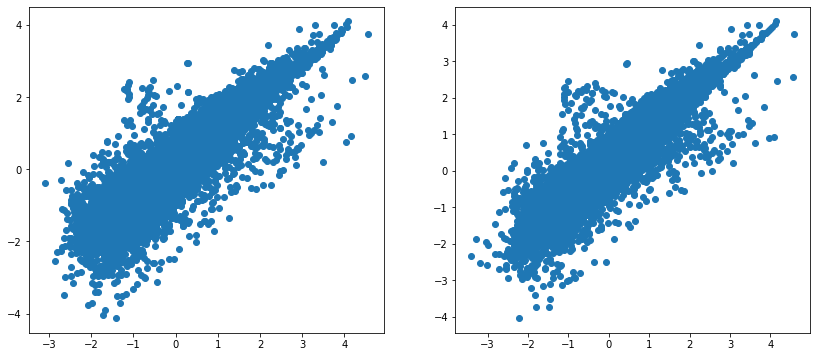

In [32]:
## Check those two pair of samples where scaling factor with TPM and RPKM differ

import matplotlib.pyplot as plt
tmp_df1 = pd.concat((rpkms_df.loc[:,"NA06986.7.M_120219_6"], rpkms_corr.loc[:,"NA06986"]), axis=1, sort=False)
tmp_df2 = pd.concat((rpkms_df.loc[:,"NA06986.2.M_111215_4"], rpkms_corr.loc[:,"NA06986"]), axis=1, sort=False)

print(coverage["NA06986.7.M_120219_6"])
print(coverage["NA06986.2.M_111215_4"])

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(np.log10(tmp_df1.iloc[:,0]), np.log10(tmp_df1.iloc[:,1]))
ax2.scatter(np.log10(tmp_df2.iloc[:,0]), np.log10(tmp_df2.iloc[:,1]))
plt.show()

# CONCLUSION: It's fine, pick the highest TPM scaling factor between two samples

In [40]:
## Index the best samples and compile the final expression results
outfile="/cbscratch/franco/datasets/geuvadis/expression/TPMS.reproc.462.allgenes.txt"
final_tpm_df = tpms_df[selected_sampids]
final_tpm_df.index.name = "gene_id"
final_tpm_df.columns = [x.split(".")[0] for x in final_tpm_df.columns]
final_tpm_df.to_csv(outfile, sep="\t", index=True, header=True)

In [41]:
# Also export counts!
outfile="/cbscratch/franco/datasets/geuvadis/expression/Counts.reproc.462.allgenes.txt"
final_counts_df = filtered_reads[selected_sampids]
final_counts_df.index.name = "gene_id"
final_counts_df.columns = [x.split(".")[0] for x in final_counts_df.columns]
final_counts_df.to_csv(outfile, sep="\t", index=True, header=True)

In [42]:
print(final_counts_df.shape)
print(final_tpm_df.shape)

(52786, 462)
(52786, 462)


In [43]:
# I ran QC gene filter in between.. just a quick check to see if I retained the same genes

tpms_qc_df = pd.read_csv("/cbscratch/franco/datasets/geuvadis/expression/tpms_qcfilter.txt", sep="\t", header=0, index_col=0)


In [46]:
genes_qc = list(tpms_qc_df.index)
genes_corr = list(rpkms_corr.index)

print(len(genes_qc), len(genes_corr))

common_genes = [x for x in genes_corr if x in genes_qc]
len(common_genes)

20619 23722


20518

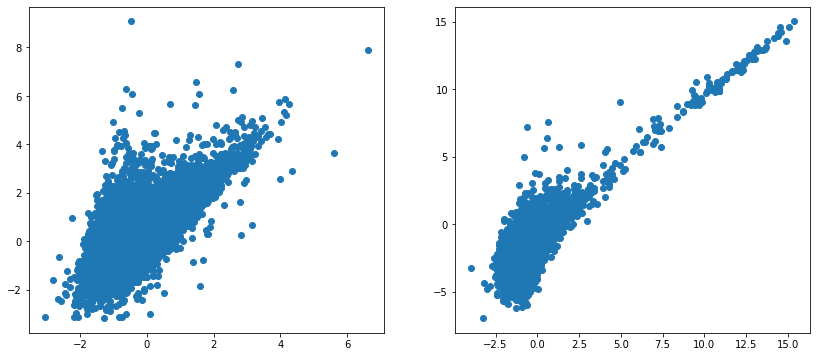

In [67]:
def centerscale_expr(Y):
    if isinstance(Y, pd.DataFrame):
        Y_cent = (Y.values - np.mean(Y.values, axis = 1).reshape(-1, 1)) / np.std(Y.values, axis = 1).reshape(-1, 1)
        Y_cent = pd.DataFrame(Y_cent, index=Y.index, columns=Y.columns)
        Y_cent.index.name = Y.index.name
    else:
        Y_cent = (Y - np.mean(Y, axis = 1).reshape(-1, 1)) / np.std(Y, axis = 1).reshape(-1, 1)
    return Y_cent

rpkms_corr_std = centerscale_expr(rpkms_corr.iloc[:,3:])
tpms_qc_df = pd.read_csv("/cbscratch/franco/datasets/geuvadis/expression/tpms_qcfilter.txt", sep="\t", header=0, index_col=0)


# tmp_df1 = pd.concat((tpms_qc_df.loc[:,"NA06986"], rpkms_corr_std.loc[:,"NA06986"]), axis=1, sort=False)
tmp_df1 = pd.concat((tpms_qc_df.loc[:,"HG00109"], rpkms_corr_std.loc[:,"HG00109"]), axis=1, sort=False)
tmp_df2 = pd.concat((tpms_qc_df.loc[:,"HG00099"], rpkms_corr_std.loc[:,"HG00099"]), axis=1, sort=False)


fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(tmp_df1.iloc[:,0], tmp_df1.iloc[:,1])
ax2.scatter(tmp_df2.iloc[:,0], tmp_df2.iloc[:,1])
plt.show()